In [1]:
# Importing Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Importing Dependencies

import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, time, datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
Base=declarative_base()

In [4]:
# Creating engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Creating a new session to start manipulating the information

session=Session(bind=engine)

In [6]:
# Declaring a Base using 'auto/map_base()'

Base= automap_base()

In [7]:
# Using the Base class to reflect the tables

Base.prepare(engine, reflect=True)

In [8]:
# Printing all of the classes mapped to the Base stored in hawaii.sqlite

Base.classes.keys()

['measurement', 'station']

In [9]:
# Creating the 'Measurement' class

Measurement = Base.classes.measurement

# Creating the 'Stations' class

Stations=Base.classes.station

In [10]:
# Displaying the rows, columns and data in dictionary format for 'Measurement'

first_row_m=session.query(Measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21fec1aa6d0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Displaying the rows, columns and data in dictionary format for 'Stations'

first_row_s=session.query(Stations).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21fec1b34f0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'id': 1,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US'}

In [12]:
# Displaying the first 2 rows of data from 'Measurement'

for row in session.query(Measurement)\
    .limit(2).all():
    print("--"*10)
    print(f"tobs:{row.tobs}")
    print(f"station:{row.station}")
    print(f"id:{row.id}")
    print(f"prcp:{row.prcp}")
    print(f"date:{row.date}")

--------------------
tobs:65.0
station:USC00519397
id:1
prcp:0.08
date:2010-01-01
--------------------
tobs:63.0
station:USC00519397
id:2
prcp:0.0
date:2010-01-02


In [13]:
# Displaying the first 2 rows of data from 'Stations'

for row in session.query(Stations)\
    .limit(2).all():
    print("--"*10)
    print(f"longitude:{row.longitude}")
    print(f"name:{row.name}")
    print(f"id:{row.id}")
    print(f"elevation:{row.elevation}")
    print(f"latitude:{row.latitude}")
    print(f"station:{row.station}")

--------------------
longitude:-157.8168
name:WAIKIKI 717.2, HI US
id:1
elevation:3.0
latitude:21.2716
station:USC00519397
--------------------
longitude:-157.8015
name:KANEOHE 838.1, HI US
id:2
elevation:14.6
latitude:21.4234
station:USC00513117


In [14]:
# Querying and printing the count of Measurements

count_measurements=session.query(Measurement).group_by(Measurement.id).count()
print(f"There are a total of {count_measurements} measurements in the dataset.")

# Querying and printing the count of Stations

count_stations=session.query(Stations).group_by(Stations.id).count()
print(f"There are a total of {count_stations} stations in the dataset.")

There are a total of 19550 measurements in the dataset.
There are a total of 9 stations in the dataset.


# Exploratory Precipitation Analysis

In [15]:
# Most recent date in the data set.

most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {most_recent_date}")

oldest_date=session.query(Measurement.date).order_by(Measurement.date).first()
print(f"The oldest date in the data set is: {oldest_date}")

The most recent date in the data set is: ('2017-08-23',)
The oldest date in the data set is: ('2010-01-01',)


In [16]:
# Formatting the date

most_recent_date=(dt.date(year=2017, month=8, day=23))
most_recent_date

datetime.date(2017, 8, 23)

In [17]:
# Retrieving the last 12 months of precipitation data

date_str=most_recent_date

query_l12m=most_recent_date-dt.timedelta(days=365) # substracting 360 days from current date
print(query_l12m)

# Querying
results_query_l12m=session.query(Measurement.date,Measurement.prcp).\
            filter(func.strftime("%Y-%m-%d", Measurement.date) < str(query_l12m))\
            .order_by(Measurement.date.desc()).limit(365).all()

results_query_l12m

2016-08-23


[('2016-08-22', 0.4),
 ('2016-08-22', 0.94),
 ('2016-08-22', None),
 ('2016-08-22', None),
 ('2016-08-22', 0.4),
 ('2016-08-22', 2.32),
 ('2016-08-22', 1.2),
 ('2016-08-21', 0.12),
 ('2016-08-21', 0.32),
 ('2016-08-21', 0.41),
 ('2016-08-21', 0.08),
 ('2016-08-21', 1.08),
 ('2016-08-20', 0.0),
 ('2016-08-20', 0.03),
 ('2016-08-20', 0.0),
 ('2016-08-20', 0.0),
 ('2016-08-20', 0.13),
 ('2016-08-20', 0.2),
 ('2016-08-19', 0.04),
 ('2016-08-19', 0.14),
 ('2016-08-19', 0.07),
 ('2016-08-19', 0.0),
 ('2016-08-19', 0.31),
 ('2016-08-19', 2.3),
 ('2016-08-18', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-18', 0.01),
 ('2016-08-18', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-18', 0.21),
 ('2016-08-17', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-17', 0.31),
 ('2016-08-17', 0.3),
 ('2016-08-16', 0.0),
 ('2016-08-16', 0.1),
 ('2016-08-16', 0.02),
 ('2016-08-16', 0.0),
 ('2016-08-16', 0.0),
 ('2016-08-16', 0.12),
 ('2016-08-1

In [18]:
# Printing Precipitation / Date table

last_12m_p=pd.DataFrame(results_query_l12m) # passing query into a dataframe
last_12m_p=last_12m_p.rename(columns={'date':'Date','prcp':'Precipitation'}) # renaming columns
last_12m_p.index=np.arange(1,len(last_12m_p)+1) # resetting index to start at 1
last_12m_p=last_12m_p.dropna() # dropping Nan values

last_12m_p

,Date,Precipitation
1,2016-08-22,0.40
2,2016-08-22,0.94
5,2016-08-22,0.40
6,2016-08-22,2.32
7,2016-08-22,1.20
...,...,...
361,2016-06-26,0.03
362,2016-06-26,0.70
363,2016-06-25,0.03
364,2016-06-25,0.80


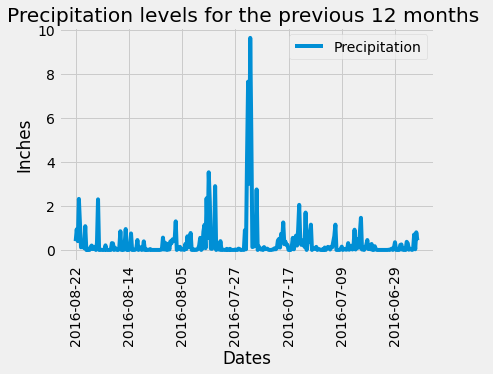

In [19]:
# Plotting last_12m_p "Precipitation / Dates"

last_12m_p.plot(x='Date', y='Precipitation', rot=90)
plt.title("Precipitation levels for the previous 12 months ")
plt.ylabel("Inches")
plt.xlabel("Dates")
plt.show()

In [20]:
# Calculating summary statistics for the precipitation data

last_12m_p.describe()

,Precipitation
count,322.000000
mean,0.322795
std,0.903342
min,0.000000
25%,0.000000
50%,0.040000
75%,0.270000
max,9.640000


# Exploratory Station Analysis

In [21]:
# Total number of stations in the dataset

total_stations=session.query(Stations.id).all()
print(f"There are a total of {len(total_stations)} stations in the dataset.")

There are a total of 9 stations in the dataset.


In [22]:
# Querying for stations with the most results

query_most_active=session.query\
        (Measurement.station, func.count(Measurement.station))\
        .group_by(Measurement.station).order_by(func.count(Measurement.station).desc())\
        .all()

query_most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Unpacking Tuples

station_name=[result[0] for result in query_most_active]
station_count=[result[1] for result in query_most_active]
station_count

[2772, 2724, 2709, 2669, 2612, 2202, 1979, 1372, 511]

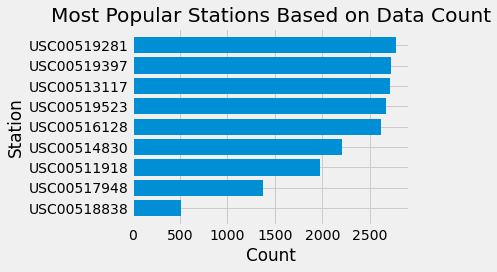

In [24]:
# Plotting most popular stations based on data counts

fig, ax = plt.subplots()
ypos = range(1, len(station_count)+1)
ax.barh(ypos, station_count[::-1])
ax.set_xlabel("Count")
ax.set_ylabel("Station")
ax.set_yticks(ypos)
ax.set_yticklabels(station_name[::-1])
ax.set_title("Most Popular Stations Based on Data Count")
fig.tight_layout()

plt.show()

In [25]:
# Querying the lowest temperature of station USC00519281

low_temp_top_s=session.query\
        (func.min(Measurement.tobs))\
        .filter(Measurement.station=='USC00519281')\
        .scalar()

print(f"The lowest temperature recorded in station USC00519281 is {low_temp_top_s}")

The lowest temperature recorded in station USC00519281 is 54.0


In [26]:
# Querying the highest temperature of station USC00519281

max_temp_top_s=session.query\
        (func.max(Measurement.tobs))\
        .filter(Measurement.station=='USC00519281')\
        .scalar()

print(f"The highest temperature recorded in station USC00519281 is {max_temp_top_s}")

The highest temperature recorded in station USC00519281 is 85.0


In [27]:
# Querying the average temperature from station USC00519281

avg_temp_top_s=session.query\
        (func.avg(Measurement.tobs))\
        .filter(Measurement.station=='USC00519281')\
        .scalar()

print(f"The average temperature recorded in station USC00519281 is {avg_temp_top_s}")

The average temperature recorded in station USC00519281 is 71.66378066378067


In [28]:
# Querying the last 12 months of temperature observation data for station USC00519281

date_str=most_recent_date
query_l12m=most_recent_date-dt.timedelta(days=365)


results=session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station=='USC00519281').\
                filter(Measurement.date>=query_l12m).all()


results

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [29]:
# Plotting results in histogram

hist_df=pd.DataFrame(results)['tobs']
hist_df

0      77.0
1      77.0
2      80.0
3      80.0
4      75.0
       ... 
347    77.0
348    77.0
349    76.0
350    76.0
351    79.0
Name: tobs, Length: 352, dtype: float64

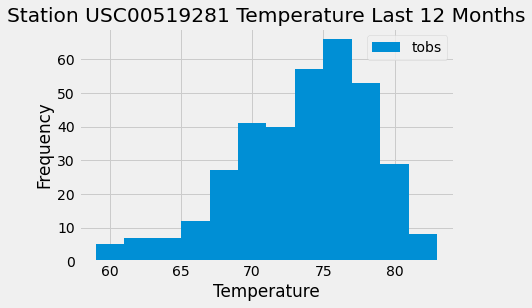

In [30]:
hist_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Station USC00519281 Temperature Last 12 Months')

plt.legend()

# Close session

In [31]:
# Close Session
session.close()